In [ ]:
#This notebook is used to test if the function perfect_mirror() from mat_functions works propperly

Rendering pass 0...


/tmp/ipykernel_11252/892399087.py:56: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  camera.observe()


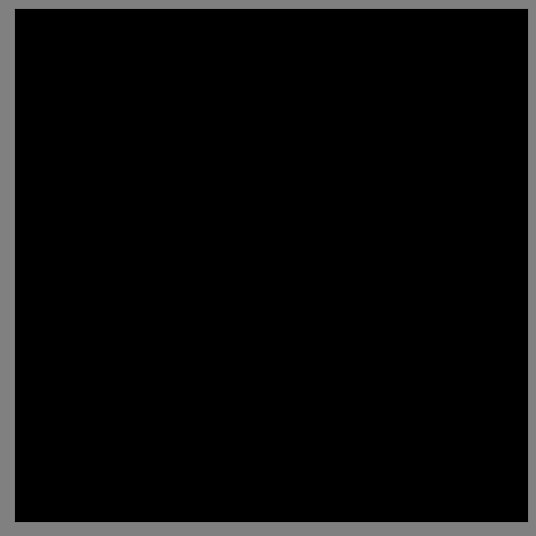

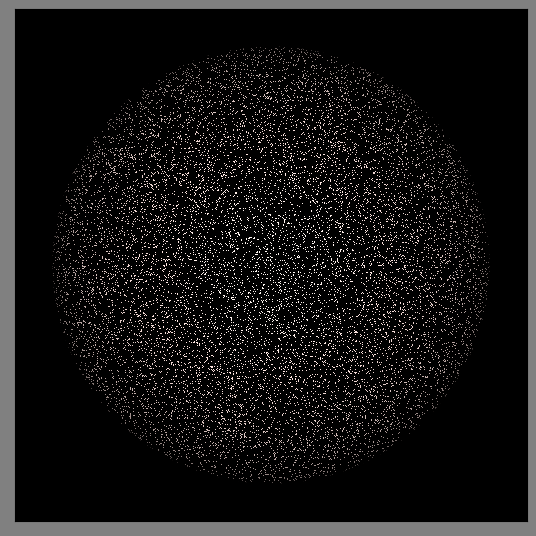

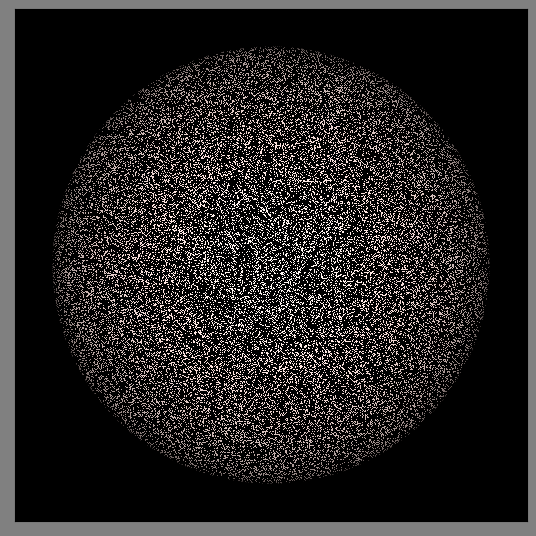

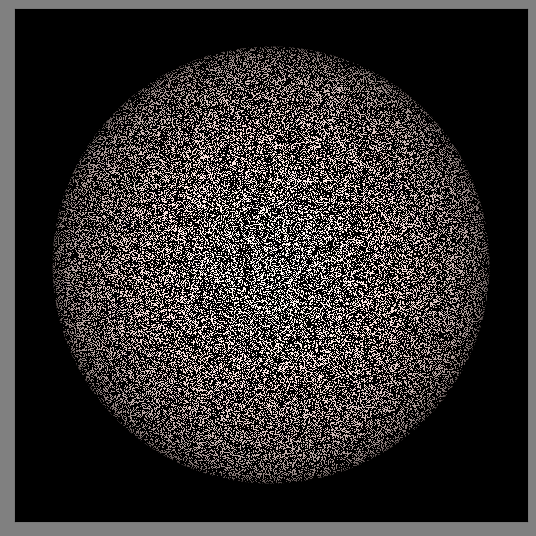

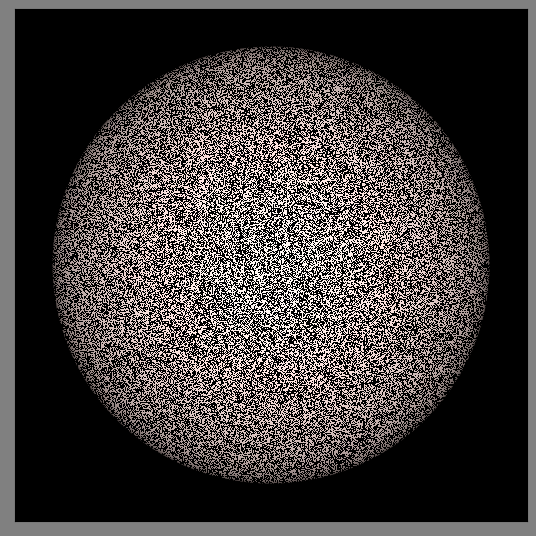

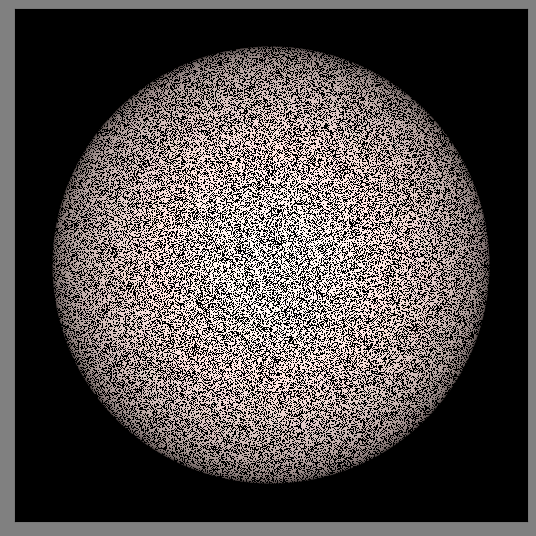

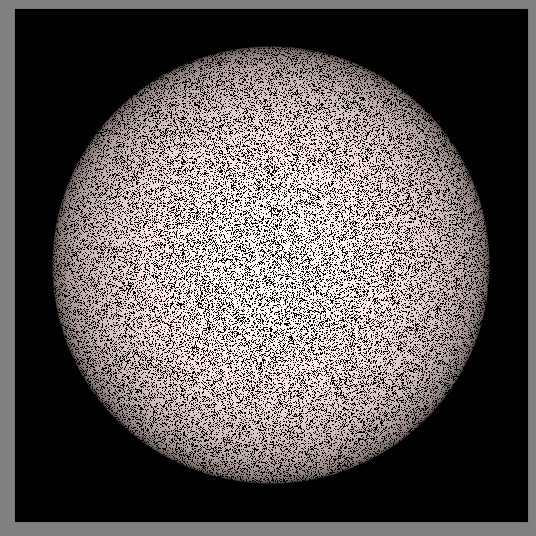

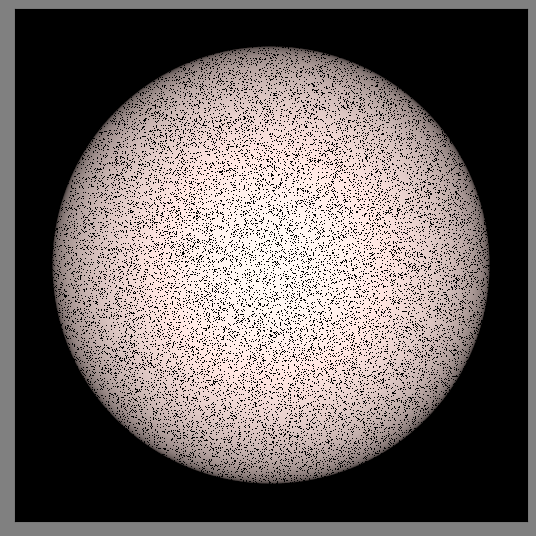

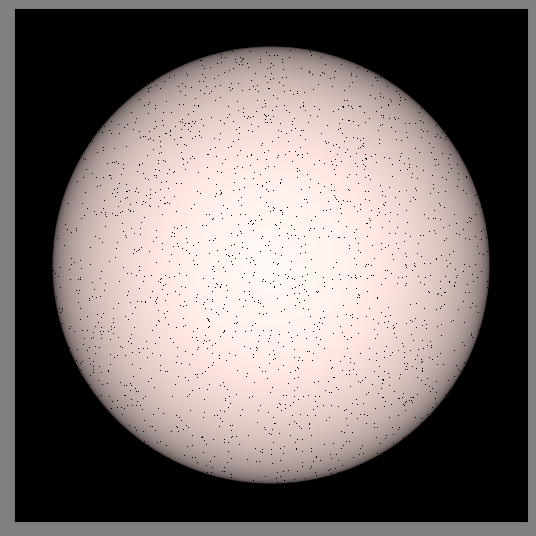

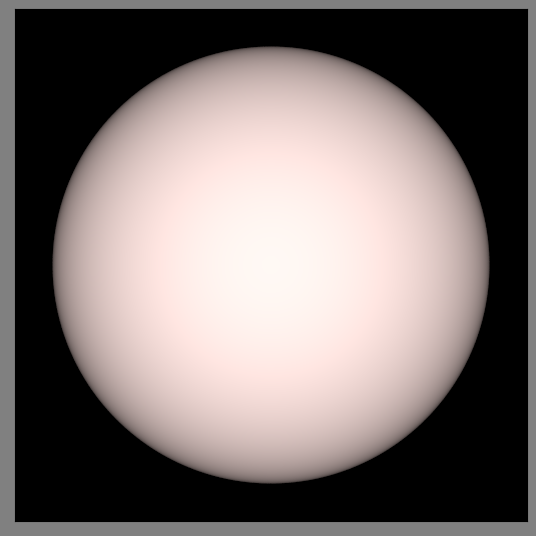


done


In [4]:
#new test
#imports
import matplotlib.pyplot as plt
from raysect.optical import World, translate, rotate, Point3D, d65_white, ConstantSF
from raysect.optical.observer import PinholeCamera
from raysect.optical.material import UniformSurfaceEmitter, Lambert
from raysect.primitive import Sphere, Box, Cylinder, Intersect, Union, Subtract
from raysect.core import rotate_x, rotate_y, rotate_z
from numpy import tan, pi
from raysect.optical.library import schott
from raysect.optical.material import Conductor


from math import pi
from raysect.core import translate, rotate
from raysect.primitive import Sphere
from raysect.optical import World, ConstantSF
from raysect.optical.observer import Pixel, PowerPipeline0D
from raysect.optical.material.emitter import UnityVolumeEmitter, UniformSurfaceEmitter


#import from mat_functions
import import_ipynb                  #Function required to do imports from jupyter notebook files 
from mat_functions import mat_materials

world = World()

perfect_mirror = mat_materials.perfect_mirror()
perfect_absorber = mat_materials.perfect_absorber()

emitter_1 = Sphere(5,transform = translate(0,0,10), parent = world)
emitter_1.material = UnityVolumeEmitter()

mirror_box = Box(Point3D(-20,-20,0),Point3D(20,0,0), parent = world, material = perfect_mirror)

emitter_2 = Sphere(5,transform = translate(0,0,-10), parent = world)
emitter_2.material = UnityVolumeEmitter()

#placing a camera for testing
camera = PinholeCamera((512, 512),
        parent=world,  transform=translate(0, 0, -5))

#Camera to test scene

camera.spectral_bins = 15
camera.pixel_samples = 100
camera.quiet = True
camera.ray_max_depth = 10
camera.ray_extinction_min_depth == 1
camera.ray_extinction_prob = 0.01

# Start ray tracing
#plt.ion()
for p in range(1):
    print("Rendering pass {}...".format(p))
    camera.observe()
    print()

# Display final result
plt.ioff()
#camera.display()
#show()

print('done')

In [ ]:
#Now testing the same thing, but with the light reflecting under an angle

Rendering pass 0...


/tmp/ipykernel_11252/3796638638.py:60: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  camera.observe()


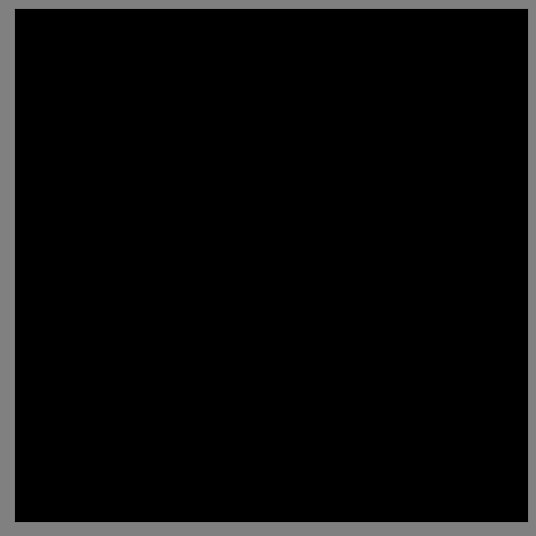

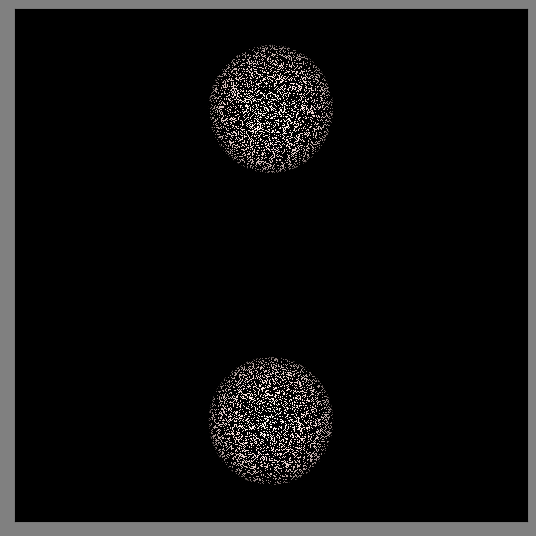

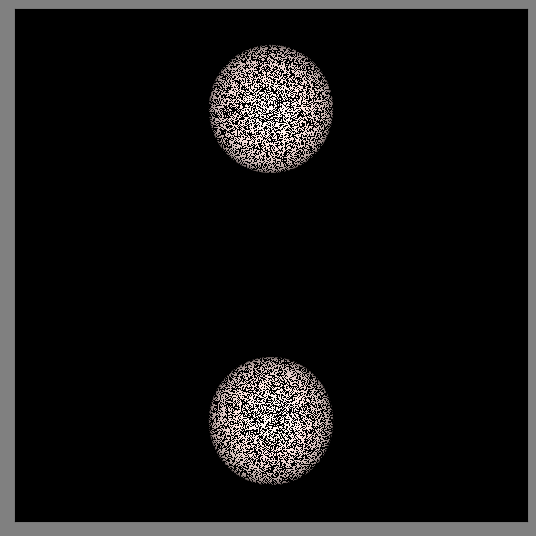

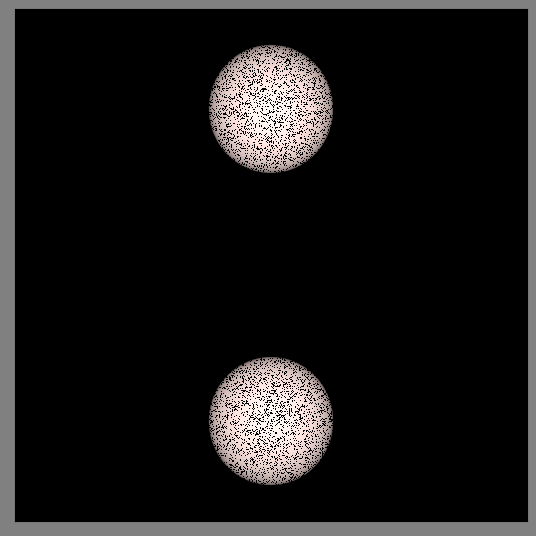

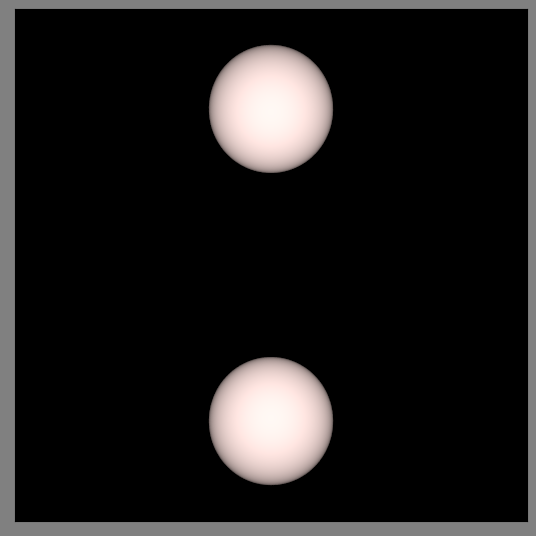


done


In [8]:
#new test
#imports
import matplotlib.pyplot as plt
from raysect.optical import World, translate, rotate, Point3D, d65_white, ConstantSF
from raysect.optical.observer import PinholeCamera
from raysect.optical.material import UniformSurfaceEmitter, Lambert
from raysect.primitive import Sphere, Box, Cylinder, Intersect, Union, Subtract
from raysect.core import rotate_x, rotate_y, rotate_z
from numpy import tan, pi
from raysect.optical.library import schott
from raysect.optical.material import Conductor


from math import pi
from raysect.core import translate, rotate
from raysect.primitive import Sphere
from raysect.optical import World, ConstantSF
from raysect.optical.observer import Pixel, PowerPipeline0D
from raysect.optical.material.emitter import UnityVolumeEmitter, UniformSurfaceEmitter
from raysect.optical.material import NullVolume


#import from mat_functions
import import_ipynb                  #Function required to do imports from jupyter notebook files 
from mat_functions import mat_materials

world = World()

perfect_mirror = mat_materials.perfect_mirror()
#from raysect.optical import ConstantSF                   
#perfect_mirror = Conductor(ConstantSF(0), ConstantSF(0)) #For testing stuff

perfect_absorber = mat_materials.perfect_absorber()

emitter_1 = Sphere(2,transform = translate(0,5,10), parent = world)
emitter_1.material = UnityVolumeEmitter()

mirror_box = Box(Point3D(-20,-20,0),Point3D(20,0,0), parent = world, material = perfect_mirror)

emitter_2 = Sphere(2,transform = translate(0,-5,-10), parent = world)
emitter_2.material = UnityVolumeEmitter()

#placing a camera for testing
camera = PinholeCamera((512, 512),
        parent=world,  transform=translate(0, 0, -10))

#Camera to test scene

camera.spectral_bins = 15
camera.pixel_samples = 100
camera.quiet = True
camera.ray_max_depth = 10
camera.ray_extinction_min_depth == 1
camera.ray_extinction_prob = 0.01

# Start ray tracing
plt.ion()
for p in range(1):
    print("Rendering pass {}...".format(p))
    camera.observe()
    print()

# Display final result
plt.ioff()
#camera.display()
#show()

print('done')

In [ ]:
#This code is not completed, hence never used
import matplotlib.pyplot as plt
from raysect.optical import World, translate, rotate, Point3D, d65_white, ConstantSF
from raysect.optical.observer import PinholeCamera
from raysect.optical.material import UniformSurfaceEmitter, Lambert
from raysect.primitive import Sphere, Box, Cylinder, Intersect, Union, Subtract
from raysect.core import rotate_x, rotate_y, rotate_z
from numpy import tan, pi
from raysect.optical.library import schott
from raysect.optical.material import Conductor


from math import pi
from raysect.core import translate, rotate
from raysect.primitive import Sphere
from raysect.optical import World, ConstantSF
from raysect.optical.observer import Pixel, PowerPipeline0D
from raysect.optical.material.emitter import UnityVolumeEmitter, UniformSurfaceEmitter


#import from mat_functions
import import_ipynb                  #Function required to do imports from jupyter notebook files 
from mat_functions import mat_materials

perfect_mirror = mat_materials.perfect_mirror()
perfect_absorber = mat_materials.perfect_absorber()

#Defining the world
world = World()

#Creating emission box
source_material = UniformSurfaceEmitter(d65_white, 1)

source_2 =  Sphere(5,transform = translate(-25,0,0), parent = world)
source_2.material = UnityVolumeEmitter()

#setting up the box to block rays 
block_box = Box(Point3D(-0.1,-6,-6),Point3D(0.1,6,6), parent = world,material = perfect_absorber)


#Creating the observing plane
samples = 100000
min_wl = 400
max_wl = 401

power = PowerPipeline0D(accumulate=False)
observing_plane = Pixel([power], x_width=10, y_width=10,
                        min_wavelength=min_wl, max_wavelength=max_wl,
                        spectral_bins=1, pixel_samples=samples,
                        parent=world, transform=rotate(0, 0, 0)*translate(-25, 0, 10))

observing_plane.observe()
measured_power =  power.value.mean
print('Measured power', round(measured_power,3))



#placing a camera for testing
camera = PinholeCamera((512, 512),
        parent=world,  transform=translate(0, 0, -100))



#Camera to test scene

camera.spectral_bins = 15
camera.pixel_samples = 100
camera.quiet = True
camera.ray_max_depth = 10
camera.ray_extinction_min_depth == 1
camera.ray_extinction_prob = 0.01

# Start ray tracing
plt.ion()
for p in range(1):
    print("Rendering pass {}...".format(p))
    camera.observe()
    print()

# Display final result
plt.ioff()
#camera.display()
#show()

print('done')


In [ ]:
#Example below is from the Raysect documentation

In [2]:
from math import pi
from raysect.core import translate, rotate
from raysect.primitive import Sphere, Box
from raysect.optical import World, ConstantSF
from raysect.optical.observer import Pixel, PowerPipeline0D
from raysect.optical.material.emitter import UnityVolumeEmitter, UniformSurfaceEmitter

samples = 1000000

sphere_radius = 0.5
cube_size = 2

min_wl = 400
max_wl = 401

# set-up scenegraph
world = World()
emitter = Sphere(radius=sphere_radius, parent=world)

power = PowerPipeline0D(accumulate=False)
observing_plane = Pixel([power], x_width=cube_size, y_width=cube_size,
                        min_wavelength=min_wl, max_wavelength=max_wl,
                        spectral_bins=1, pixel_samples=samples,
                        parent=world, transform=rotate(0, 0, 0)*translate(0, 0, -cube_size / 2))

print("Starting observations with volume emitter...")
calculated_volume_emission = 16 / 3 * pi**2 * sphere_radius**3 * (max_wl - min_wl)

emitter.material = UnityVolumeEmitter()
observing_plane.observe()
measured_volume_emission = 6 * power.value.mean
measured_volume_error = 6 * power.value.error()

print('Expected volume emission => {} W'.format(calculated_volume_emission))
print('Measured volume emission => {} +/- {} W'.format(measured_volume_emission, measured_volume_error))

Starting observations with volume emitter...
Render time: 1.001s (36.05% complete, 455.3k rays)
Power Pipeline - incident power: 1.1 +/- 0.003029 W
Render complete - time elapsed 1.935s - 652.4k rays/s
Expected volume emission => 6.579736267392905 W
Measured volume emission => 6.602162264744459 +/- 0.018175140830907655 W


In [ ]:
#Same code, but with 5 aditional perfect mirrors and the *6 removed

In [ ]:
#Working, confirms reflectance

In [4]:
from math import pi
from raysect.core import translate, rotate
from raysect.primitive import Sphere, Box
from raysect.optical import World, ConstantSF, Point3D
from raysect.optical.observer import Pixel, PowerPipeline0D
from raysect.optical.material.emitter import UnityVolumeEmitter, UniformSurfaceEmitter

samples = 1000000

#import from mat_functions
import import_ipynb                  #Function required to do imports from jupyter notebook files 
from mat_functions import mat_materials

perfect_mirror = mat_materials.perfect_mirror()
 
sphere_radius = 0.5
cube_size = 2

min_wl = 400
max_wl = 401

# set-up scenegraph
world = World()
emitter = Sphere(radius=sphere_radius, parent=world)

power = PowerPipeline0D(accumulate=False)
observing_plane = Pixel([power], x_width=cube_size, y_width=cube_size,
                        min_wavelength=min_wl, max_wavelength=max_wl,
                        spectral_bins=1, pixel_samples=samples,
                        parent=world, transform=rotate(0, 0, 0)*translate(0, 0, -cube_size / 2))



#Adding the mirror boxes
mirror_box_1 = Box(Point3D(-cube_size / 2,-cube_size / 2,-cube_size / 200),Point3D(cube_size / 2,cube_size / 2,cube_size / 200), parent = world,
                 transform=rotate(0, 0, 0)*translate(0, 0, cube_size / 2),material = perfect_mirror)

mirror_box_2 = Box(Point3D(-cube_size / 2,-cube_size / 200,-cube_size / 2),Point3D(cube_size / 2,cube_size / 200,cube_size / 2), parent = world,
                 transform=rotate(0, 0, 0)*translate(0, cube_size / 2, 0),material = perfect_mirror)

mirror_box_3 = Box(Point3D(-cube_size / 2,-cube_size / 200,-cube_size / 2),Point3D(cube_size / 2,cube_size / 200,cube_size / 2), parent = world,
                 transform=rotate(0, 0, 0)*translate(0, -cube_size / 2, 0),material = perfect_mirror)

mirror_box_4 = Box(Point3D(-cube_size / 200,-cube_size / 2,-cube_size / 2),Point3D(cube_size / 200,cube_size / 2,cube_size / 2), parent = world,
                 transform=rotate(0, 0, 0)*translate(-cube_size / 2, 0, 0),material = perfect_mirror)

mirror_box_5 = Box(Point3D(-cube_size / 200,-cube_size / 2,-cube_size / 2),Point3D(cube_size / 200,cube_size / 2,cube_size / 2), parent = world,
                 transform=rotate(0, 0, 0)*translate(cube_size / 2, 0, 0),material = perfect_mirror)

print("Starting observations with volume emitter...")
calculated_volume_emission = 16 / 3 * pi**2 * sphere_radius**3 * (max_wl - min_wl)

emitter.material = UnityVolumeEmitter()
observing_plane.observe()
measured_volume_emission =  power.value.mean
measured_volume_error =  power.value.error()

print('Expected volume emission => {} W'.format(calculated_volume_emission))
print('Measured volume emission => {} +/- {} W'.format(measured_volume_emission, measured_volume_error))

Starting observations with volume emitter...
Render time: 1.000s (3.67% complete, 266.0k rays)
Render time: 2.004s (12.47% complete, 636.7k rays)
Render time: 3.005s (22.02% complete, 690.8k rays)
Render time: 4.009s (31.75% complete, 700.6k rays)
Render time: 5.009s (41.35% complete, 694.6k rays)
Render time: 6.011s (48.88% complete, 542.1k rays)
Render time: 7.013s (60.00% complete, 804.3k rays)
Render time: 8.015s (67.70% complete, 555.5k rays)
Render time: 9.059s (79.05% complete, 818.1k rays)
Render time: 10.065s (90.45% complete, 822.5k rays)
Render time: 11.081s (99.45% complete, 650.8k rays)
Power Pipeline - incident power: 6.553 +/- 0.01367 W
Render complete - time elapsed 11.154s - 647.4k rays/s
Expected volume emission => 6.579736267392905 W
Measured volume emission => 6.552605916096216 +/- 0.013674476779583907 W
